In [1]:
from sklearn import datasets
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import tensorflow as tf

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [3]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [4]:
svm = SVC(kernel = 'linear' , C = 0.5)
svm.fit(X , y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

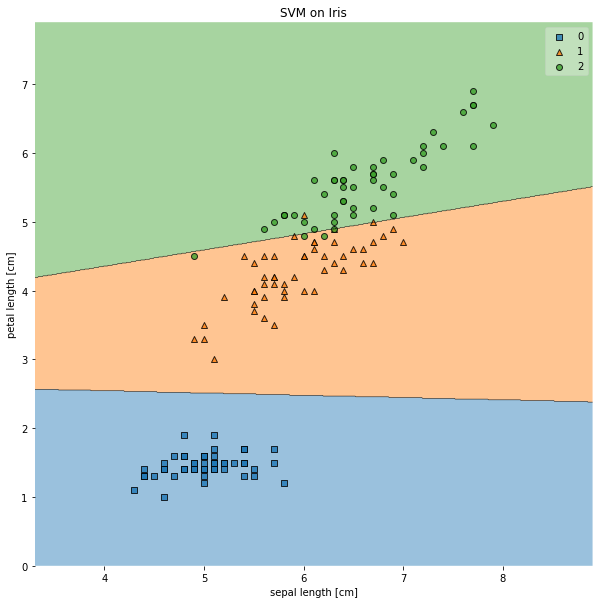

In [5]:
plt.figure(figsize = (10 , 10))
plot_decision_regions(X , y , clf = svm , legend = 1)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

In [6]:
df = pd.read_csv('C:/Users/Mahmudur Limon/Downloads/data/Deep Learning/geoloc_elev.csv')
df.head()

,lat,lon,elev,source,target
0,0.106264,0.068264,0.542477,S,1
1,0.099569,0.132094,0.722289,C,1
2,-0.775751,-0.814161,0.214760,S,0
3,-0.159833,0.040773,0.478576,S,1
4,-0.096395,0.021420,0.270322,C,1


In [7]:
X = df[['lat', 'lon']].values
y = df['target'].values

<Figure size 1440x1440 with 0 Axes>

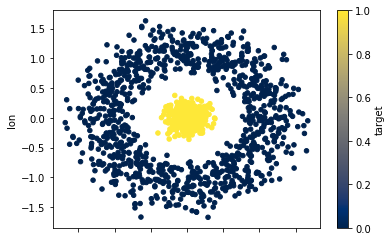

In [8]:
plt.figure(figsize = (20 , 20))
df.plot(kind = 'scatter',
        x = 'lat',
        y = 'lon',
        c = 'target',
        cmap = 'cividis');

In [9]:
clf = SVC(kernel = 'linear' , C = 0.5)
clf.fit(X, y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

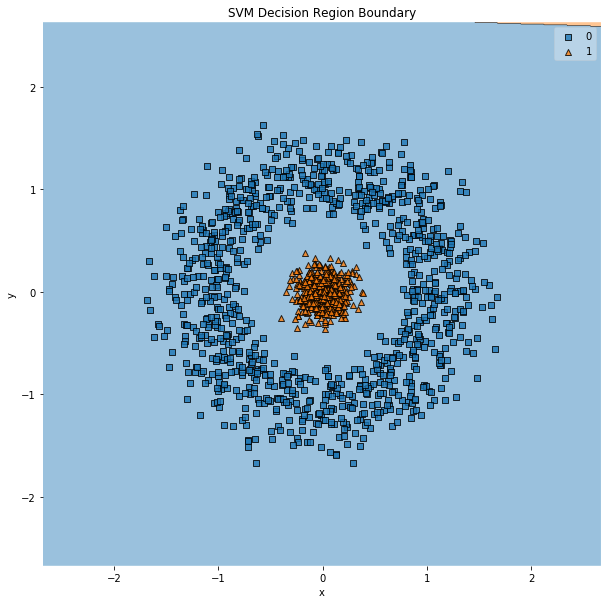

In [10]:
plt.figure(figsize = (10 , 10))
plot_decision_regions(X , y , clf = svm , legend = 1)

plt.xlabel('x')
plt.ylabel('y')
plt.title('SVM Decision Region Boundary')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

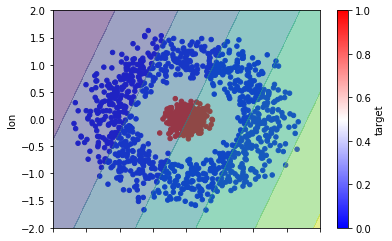

In [13]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = lr.predict_proba(ab)[:,1]
cc = c.reshape(aa.shape)

ax = df.plot(kind = 'scatter' , c = 'target' , x = 'lat', y ='lon' , cmap='bwr')
ax.contourf(aa, bb, cc, cmap='viridis', alpha=0.5)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
result = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 1s 1ms/sample - loss: 0.6581 - accuracy: 0.5704 - val_loss: 0.6328 - val_accuracy: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 180us/sample - loss: 0.6103 - accuracy: 0.6582 - val_loss: 0.6156 - val_accuracy: 0.6381
Epoch 3/20
945/945 [==============================] - 0s 174us/sample - loss: 0.5915 - accuracy: 0.6413 - val_loss: 0.6049 - val_accuracy: 0.6381
Epoch 4/20
945/945 [==============================] - 0s 179us/sample - loss: 0.5771 - accuracy: 0.6487 - val_loss: 0.5891 - val_accuracy: 0.6381
Epoch 5/20
945/945 [==============================] - 0s 164us/sample - loss: 0.5680 - accuracy: 0.6582 - val_loss: 0.5809 - val_accuracy: 0.6381
Epoch 6/20
945/945 [==============================] - 0s 170us/sample - loss: 0.5585 - accuracy: 0.6296 - val_loss: 0.5769 - val_accuracy: 0.6381
Epoch 7/20
945/945 [==============================] - 0s 178us/sample - loss: 0.

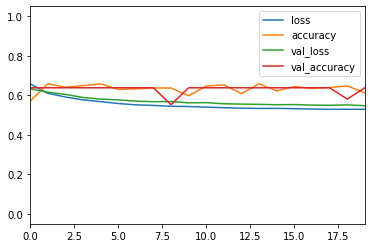

In [15]:
pd.DataFrame(result.history).plot(ylim=(-0.05, 1.05))

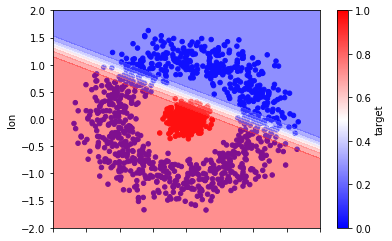

In [16]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

# c = model.predict_proba(ab)[:,1]
c = model.predict_proba(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim=2, activation='tanh'),
    # tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 1s 947us/sample - loss: 0.6470 - accuracy: 0.6138 - val_loss: 0.6260 - val_accuracy: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 181us/sample - loss: 0.5805 - accuracy: 0.6836 - val_loss: 0.5433 - val_accuracy: 0.6381
Epoch 3/20
945/945 [==============================] - 0s 173us/sample - loss: 0.4670 - accuracy: 0.9259 - val_loss: 0.4165 - val_accuracy: 0.9810
Epoch 4/20
945/945 [==============================] - 0s 173us/sample - loss: 0.3411 - accuracy: 0.9979 - val_loss: 0.2962 - val_accuracy: 1.0000
Epoch 5/20
945/945 [==============================] - 0s 171us/sample - loss: 0.2460 - accuracy: 0.9989 - val_loss: 0.2176 - val_accuracy: 1.0000
Epoch 6/20
945/945 [==============================] - 0s 171us/sample - loss: 0.1845 - accuracy: 1.0000 - val_loss: 0.1717 - val_accuracy: 1.0000
Epoch 7/20
945/945 [==============================] - 0s 172us/sample - loss: 

In [18]:

from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict_classes(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

,pred_Miss,pred_Hit
Miss,311,0
Hit,0,139


In [20]:
train_score = model.evaluate(X_train, y_train, verbose=0)[1]
test_score = model.evaluate(X_test, y_test,  verbose=0)[1]

print("""Accuracy scores:
   Train:\t{:0.3}
   Test:\t{:0.3}""".format(train_score, test_score))

Accuracy scores:
   Train:	1.0
   Test:	1.0


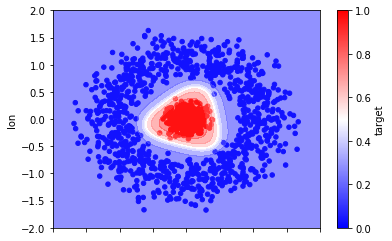

In [21]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)